In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import numpy as np
import cv2
import math
from scipy import ndimage


np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.layers.normalization import BatchNormalization


Using TensorFlow backend.


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
Y_train = train.label
X_train = train.drop(labels="label", axis = 1)

del train

X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [4]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [5]:
# Normamalize the data
X_train = X_train / 255.0
test = test / 255.0

In [6]:
X_train = X_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

In [7]:
Y_train = to_categorical(Y_train, num_classes=10)

In [8]:
random_seed = 5

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size =0.1, random_state = random_seed)

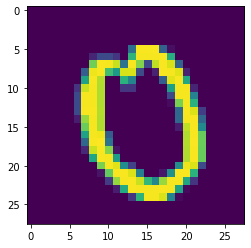

In [9]:
g = plt.imshow(X_train[2][:,:,0])

In [14]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = 3, activation = "relu", input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = 3, activation = "relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=32,kernel_size=5,strides=2,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate = 0.4))

model.add(Conv2D(filters = 64, kernel_size = 3, activation = "relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size = 3, activation = "relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size = 5, strides = 2,activation = "relu", padding = "same"))
model.add(BatchNormalization())
model.add(Dropout(rate = 0.4))

model.add(Flatten())
model.add(Dense(128, activation= "relu"))
model.add(BatchNormalization())
model.add(Dropout(rate = 0.4))
model.add(Dense(10, activation = "softmax"))

In [15]:
model.compile(optimizer="adam", loss = "categorical_crossentropy", metrics= ["accuracy"])

In [16]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_8 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_9 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 12, 32)        25632     
_________________________________________________________________
batch_normalization_10 (Batc (None, 12, 12, 32)        128       
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 32)        0         
__________

In [18]:
datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.10,  
        width_shift_range=0.1, 
        height_shift_range=0.1)

In [19]:
datagen.fit(X_train)

In [20]:
epochs = 30
batch_size = 64

In [22]:
hist = model.fit_generator(datagen.flow(X_train, Y_train, batch_size = batch_size),
                          epochs=epochs, validation_data=(X_val, Y_val),
                          steps_per_epoch= X_train.shape[0] // batch_size,
                          verbose= 2, callbacks=[learning_rate_reduction])

Epoch 1/30
 - 226s - loss: 0.0760 - acc: 0.9772 - val_loss: 0.0392 - val_acc: 0.9888
Epoch 2/30
 - 227s - loss: 0.0728 - acc: 0.9781 - val_loss: 0.0295 - val_acc: 0.9905
Epoch 3/30
 - 226s - loss: 0.0620 - acc: 0.9814 - val_loss: 0.0278 - val_acc: 0.9914
Epoch 4/30
 - 226s - loss: 0.0574 - acc: 0.9828 - val_loss: 0.0216 - val_acc: 0.9936
Epoch 5/30
 - 226s - loss: 0.0551 - acc: 0.9834 - val_loss: 0.0317 - val_acc: 0.9912
Epoch 6/30
 - 226s - loss: 0.0513 - acc: 0.9841 - val_loss: 0.0268 - val_acc: 0.9929
Epoch 7/30
 - 226s - loss: 0.0545 - acc: 0.9842 - val_loss: 0.0229 - val_acc: 0.9931

Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 8/30
 - 228s - loss: 0.0391 - acc: 0.9885 - val_loss: 0.0204 - val_acc: 0.9943
Epoch 9/30
 - 228s - loss: 0.0364 - acc: 0.9894 - val_loss: 0.0239 - val_acc: 0.9938
Epoch 10/30
 - 227s - loss: 0.0341 - acc: 0.9892 - val_loss: 0.0227 - val_acc: 0.9943
Epoch 11/30
 - 227s - loss: 0.0348 - acc: 0.9898 - val_loss: 0.0233 

In [ ]:

# Load an color image in grayscale
img = cv2.imread('@@@3.jpg',0)
img = cv2.resize(img, (28 , 28))
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
gray=th3
while np.sum(gray[0]) == 0:
    gray = gray[1:]

while np.sum(gray[:,0]) == 0:
    gray = np.delete(gray,0,1)

while np.sum(gray[-1]) == 0:
    gray = gray[:-1]

while np.sum(gray[:,-1]) == 0:
    gray = np.delete(gray,-1,1)

rows,cols = gray.shape
if rows > cols:
    factor = 20.0/rows
    rows = 20
    cols = int(round(cols*factor))
    gray = cv2.resize(gray, (cols,rows))
else:
    factor = 20.0/cols
    cols = 20
    rows = int(round(rows*factor))
    gray = cv2.resize(gray, (cols, rows))
    
    
colsPadding = (int(math.ceil((28-cols)/2.0)),int(math.floor((28-cols)/2.0)))
rowsPadding = (int(math.ceil((28-rows)/2.0)),int(math.floor((28-rows)/2.0)))
gray = np.lib.pad(gray,(rowsPadding,colsPadding),'constant')
g=gray

def getBestShift(img):
    cy,cx = ndimage.measurements.center_of_mass(img)
    rows,cols = img.shape
    shiftx = np.round(cols/2.0-cx).astype(int)
    shifty = np.round(rows/2.0-cy).astype(int)

    return shiftx,shifty

def shift(img,sx,sy):
    rows,cols = img.shape
    M = np.float32([[1,0,sx],[0,1,sy]])
    shifted = cv2.warpAffine(img,M,(cols,rows))
    return shifted
shiftx,shifty = getBestShift(g)
shifted = shift(g,shiftx,shifty)
g = shifted
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(g,kernel,iterations = 1)


In [ ]:
ret,erosion = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)

In [ ]:
Y = erosion.reshape(-1,28,28,1)

In [ ]:
print(erosion.shape)

In [ ]:
cv2.imshow('image',img)
cv2.waitKey(1)
cv2.destroyAllWindows()

In [ ]:
results = model.predict(Y)

results = np.argmax(results, axis = 1)
results = pd.Series(results, name = "Label")
print(results)